In [67]:
import pandas as pd
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt

In [68]:
consumer_key = 'stKuSL7WMShoaR0Se9fwHIkjW'
consumer_secret = 'aIvT6hm6GqxaW0BfPe0VUZcwJJEHDebIawU9N9B8KGAckiog1Q'
access_token = '293588703-08HTWRdhrTGkI4zjdlApfsy8tmPsqrGeigDubOqf'
access_token_secret = 'Pvkfl4zA5RsGo8uBbX2GKHxEUnRKR01kYGh7IQVj805sv'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [69]:
list_U = ['Proarbol_Col', 'FNAmbiental', 'fundacionnatura', 'inst_humboldt', 'WWFColombia', 'ricardolozanop', 'mafsul', 'MinMinas', 'MinAmbienteCo']
list_H = ['NoAlFracking', 'Fracking', 'Ambiente', 'Asbesto', 'ColombiaSinAsbesto', 'MedioAmbiente', 'Contaminacion', 'Plasticos']

list_of_tweets = []
c=0
for i in list_U:
    for j in list_H:
        consul = tweepy.Cursor(api.search, q='from:'+str(i)+' '+str(j)).items()
        for tweet in consul:
            dict_ = {'User': tweet.user.name,
                     'User_Name': tweet.user.screen_name,
                     'Text': tweet.text,
                     'Hashtag': j
                    }
            list_of_tweets.append(dict_)
            #c+=1
            #print('add '+str(c))
    
df1 = pd.DataFrame(list_of_tweets, columns=['User', 'User_Name', 'Text', 'Hashtag'])

df1

,User,User_Name,Text,Hashtag
0,PROÁRBOL,Proarbol_Col,RT @ColombiaNoFrack: En más de 70 municipios d...,Fracking
1,PROÁRBOL,Proarbol_Col,RT @op_sur: Hoy el pueblo de Colombia se movil...,Fracking
2,PROÁRBOL,Proarbol_Col,RT @hermanmartinezg: Con la careta puesta cont...,Fracking
3,PROÁRBOL,Proarbol_Col,RT @Proarbol_Col: El papa Francisco @Pontifex_...,Ambiente
4,PROÁRBOL,Proarbol_Col,El papa Francisco @Pontifex_es declara una eme...,Ambiente
5,PROÁRBOL,Proarbol_Col,RT @Proarbol_Col: Olas de calor en Sudamérica ...,Ambiente
6,PROÁRBOL,Proarbol_Col,Olas de calor en Sudamérica aumentarían entre ...,Ambiente
7,PROÁRBOL,Proarbol_Col,RT @La_network: ¿Por qué los bosques más viejo...,Ambiente
8,PROÁRBOL,Proarbol_Col,RT @Proarbol_Col: Las plantas también se están...,Ambiente
9,PROÁRBOL,Proarbol_Col,Las plantas también se están extinguiendo a un...,Ambiente


In [24]:
dff = df.groupby(['User'])['Hashtag'].value_counts().to_frame('count_hashtag')
us = df['User']
ha = df['Hashtag']


In [46]:
us = 'MinAmbienteCo'
list_of_tweets = []
c=0
consul = tweepy.Cursor(api.search, q='to:'+str(us)+' @'+str(us)).items()
for tweet in consul:
    dict_ = {'User': tweet.user.name,
             'User_Name': tweet.user.screen_name,
             'Date': tweet.created_at,
             'Text': tweet.text
            }
    list_of_tweets.append(dict_)
    #c+=1
    #print('add '+str(c))
    
df2 = pd.DataFrame(list_of_tweets, columns=['User', 'User_Name', 'Date', 'Text'])

df2

,User,User_Name,Date,Text
0,CUIDEMOS EL AGUA,cuidemoselagua5,2019-06-16 18:52:17,@MinAmbienteCo @infopresidencia @IvanDuque @Vi...
1,MonnyLu,Monik2542,2019-06-16 15:54:15,@MinAmbienteCo @IvanDuque la tala de árboles ...
2,jpdevia10,DeviaYennyPa,2019-06-16 13:41:02,@MinAmbienteCo @infopresidencia @ParquesColomb...
3,Martha Lucía Gutiérrez Cedeño,malusitasoyyo,2019-06-16 05:26:50,@MinAmbienteCo @AlcaldiadeMed @IvanDuque @info...
4,Martha Lucía Gutiérrez Cedeño,malusitasoyyo,2019-06-16 05:24:41,@MinAmbienteCo @IvanDuque @infopresidencia @Al...
5,Martha Lucía Gutiérrez Cedeño,malusitasoyyo,2019-06-16 05:23:15,@MinAmbienteCo @infopresidencia @IvanDuque @AN...
6,Martha Lucía Gutiérrez Cedeño,malusitasoyyo,2019-06-16 05:20:23,@MinAmbienteCo @IvanDuque @infopresidencia @Go...
7,Martha Lucía Gutiérrez Cedeño,malusitasoyyo,2019-06-16 05:18:45,@MinAmbienteCo @infopresidencia @IvanDuque @Mi...
8,Martha Lucía Gutiérrez Cedeño,malusitasoyyo,2019-06-16 05:14:49,@MinAmbienteCo @infopresidencia @ViceColombia ...
9,Martha Lucía Gutiérrez Cedeño,malusitasoyyo,2019-06-16 05:11:09,@MinAmbienteCo @CamaraMedellin @Embajada_UE @M...


C:\Users\norbe\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


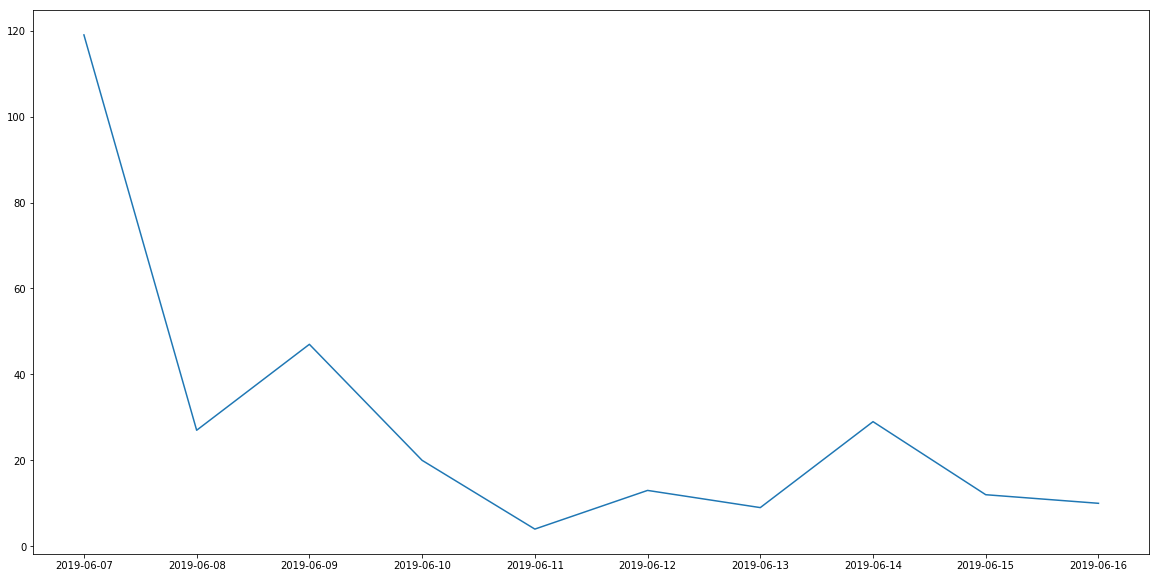

In [57]:
fig, axes = plt.subplots(figsize=(20, 10))
df3 = df2
df3['Date'] = df3['Date'].astype(str).str[:10]
df3 = df3['Date'].value_counts()
df3 = df3.rename_axis('Date').reset_index(name='Count')
df3['Date'] = pd.to_datetime(df3.Date)
df3.sort_values(by=['Date'], inplace=True, ascending=True)
dat = df3['Date']
cou = df3['Count']
plt.plot(dat, cou)
fig.show()

In [70]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
ha = 'fracking'
list_of_tweets = []
c=0
consul = tweepy.Cursor(api.search, q='#'+str(ha), geocode="4.6097100,-74.0817500,500km").items()
for tweet in consul:
    dict_ = {'User': tweet.user.name,
             'User_Name': tweet.user.screen_name,
             'Date': tweet.created_at,
             'Text': tweet.text
            }
    list_of_tweets.append(dict_)
    #c+=1
    #print('add '+str(c))
    
df4 = pd.DataFrame(list_of_tweets, columns=['User', 'User_Name', 'Date', 'Text'])

df4

,User,User_Name,Date,Text
0,Paula Giraldo,paugiraldo05,2019-06-16 20:07:09,RT @pantallazos_not: Más que principio de prec...
1,INESPP,ines3718,2019-06-16 18:01:17,RT @FisicoImpuro: A pesar q soy Ing de Petróle...
2,Guillermo Rugeles,GuillermoRugel3,2019-06-16 17:53:32,RT @ipetrolera: #PolíticasPúblicas Sobre el #f...
3,Alejandro Posada Penagos,AlejandroP777,2019-06-16 17:11:27,"Ni MinHac, MinDef, MinTrab, MinEduc, MinAmb, v..."
4,Ricardo Artunduaga,RicardoArtundu7,2019-06-16 17:02:21,RT @Yanelda: A esta hora la comunidad en #Pita...
5,CESAR E. RAMÍREZ D.,ANGEL_ESCARLATA,2019-06-16 16:41:31,La incoherencia en pasta\n#PorUnaEconomíaCircu...
6,CESAR E. RAMÍREZ D.,ANGEL_ESCARLATA,2019-06-16 16:34:00,Hay que ser muy descarado en esta vida para ha...
7,ACIPET,Acipet_CO,2019-06-16 16:21:31,RT @pantallazos_not: Más que principio de prec...
8,Pantallazos noticias,pantallazos_not,2019-06-16 16:07:11,"Más que principio de precaución, se requiere d..."
9,Int. Petrolera,ipetrolera,2019-06-16 15:30:00,#PolíticasPúblicas Sobre el #fracking MÁS QUE ...


C:\Users\norbe\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


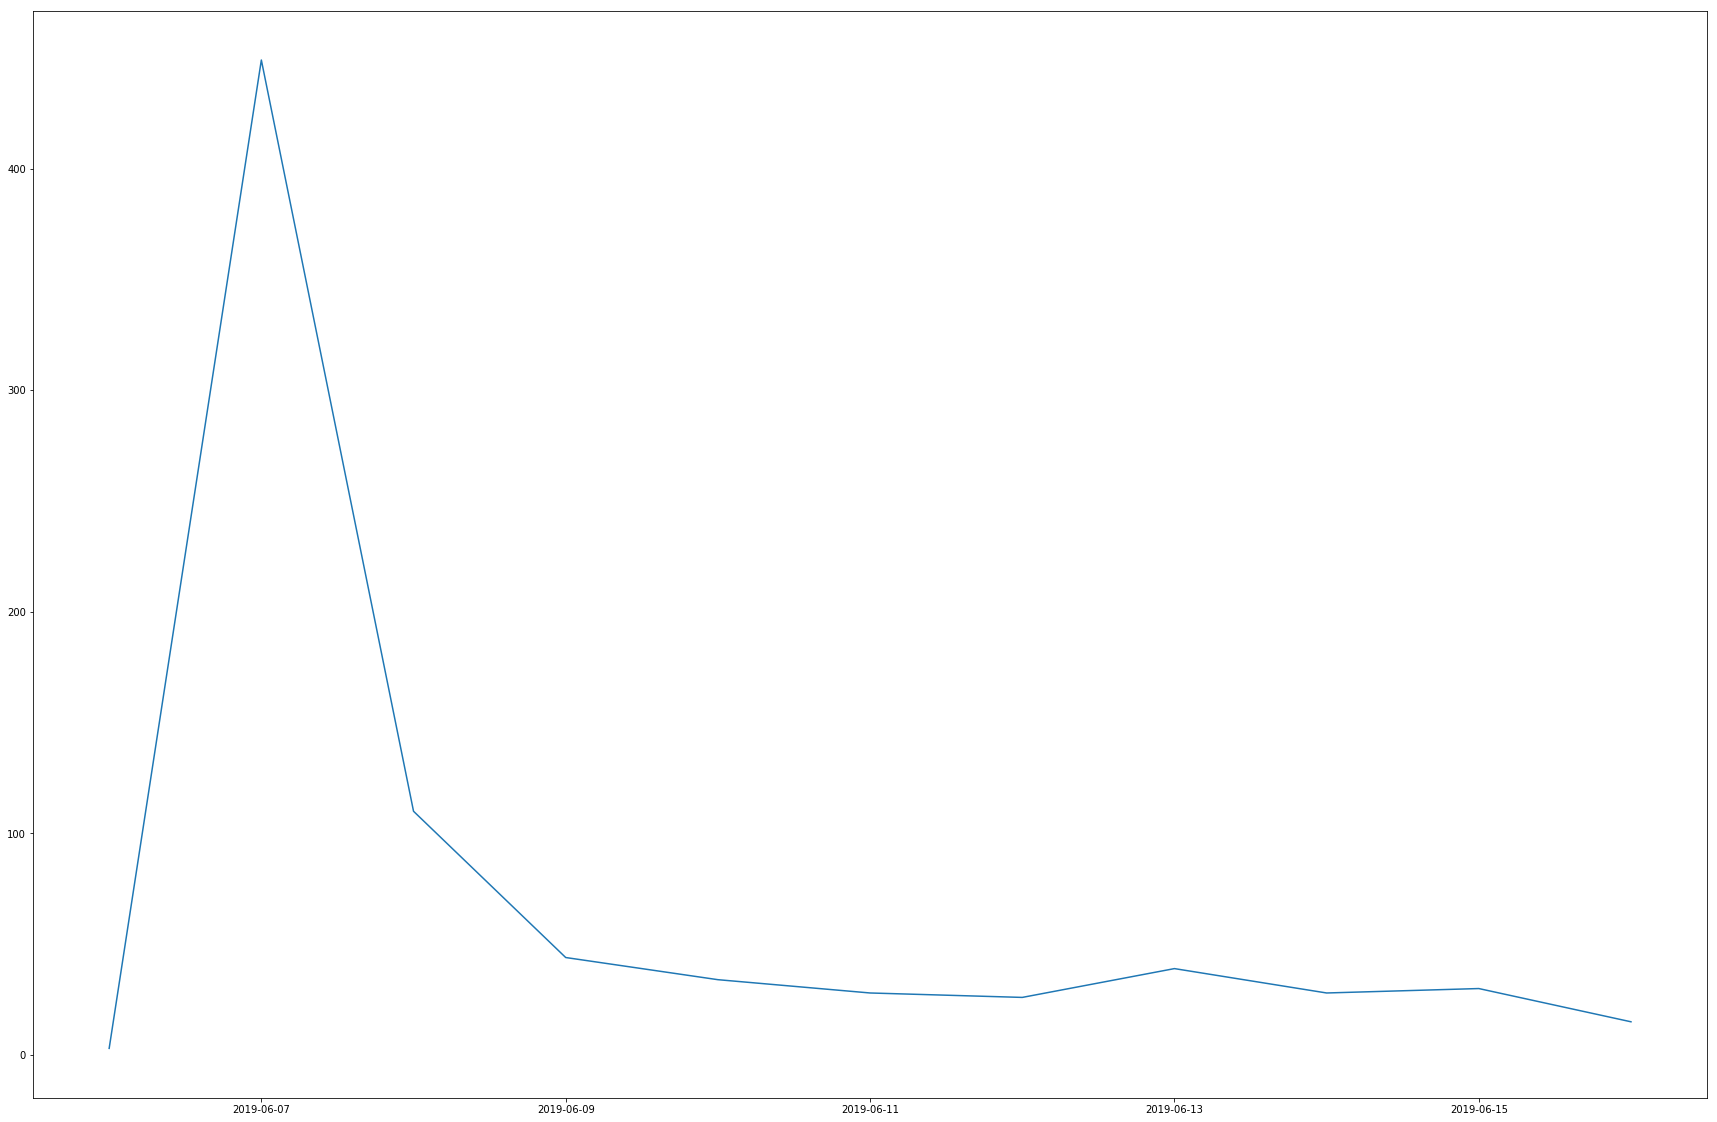

In [66]:
fig, axes = plt.subplots(figsize=(30, 20))
df5 = df4
df5['Date'] = df5['Date'].astype(str).str[:10]
df5 = df5['Date'].value_counts()
df5 = df5.rename_axis('Date').reset_index(name='Count')
df5['Date'] = pd.to_datetime(df5.Date)
df5.sort_values(by=['Date'], inplace=True, ascending=True)
dat = df5['Date']
cou = df5['Count']
plt.plot(dat, cou)
fig.show()